In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# Read the Drug Data and the Clinical Trial Data
trial_data = pd.read_csv(clinical_trial_data_to_load)
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
merged_data = pd.merge(mouse_data, trial_data, on='Mouse ID',how='inner')

In [7]:
# Display the data table for preview
merged_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_mean = merged_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_vol = pd.DataFrame(grouped_mean)

# Preview DataFrame
mean_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_sem = merged_data.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
sem_tumor_vol = pd.DataFrame(grouped_sem)

# Preview DataFrame
sem_tumor_vol.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Use .unstack() to pivot by first index 
mean_tumor_vol2 = mean_tumor_vol.unstack(level=0)

# Rework column labels, pull from second column set
# Quicker than iterating and renaming each column
mean_tumor_vol2.columns = mean_tumor_vol2.columns.get_level_values(1)

# Preview that Reformatting worked
mean_tumor_vol2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Use .unstack() to pivot by first index 
sem_tumor_vol2 = sem_tumor_vol.unstack(level=0)

# Rework column labels, pull from second column set
# Quicker than iterating and renaming each column
sem_tumor_vol2.columns = sem_tumor_vol2.columns.get_level_values(1)

# Preview that Reformatting worked
sem_tumor_vol2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


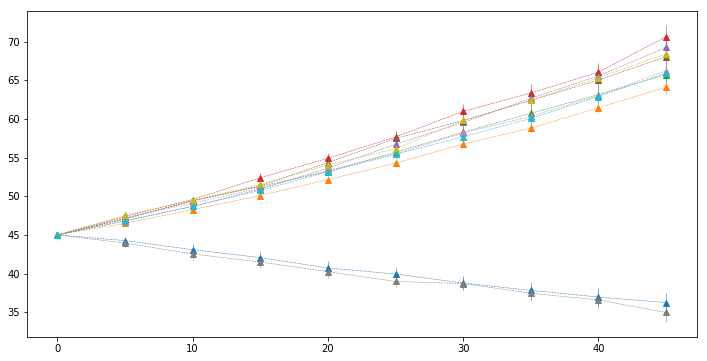

In [24]:
# Generate the Plot (with Error Bars)
x_axis = mean_tumor_vol2.index.values
med_list = mean_tumor_vol2.columns.values
plt.figure(figsize=(12,6))
for medicine in med_list:
    plt.errorbar(x_axis,mean_tumor_vol2[medicine],yerr=sem_tumor_vol2[medicine],
                 marker='^',lw=.5,ls='--',label=medicine)

# Format plot details
plt.legend(loc='upper left')
plt.grid(b=True)
plt.title('Change in Tumor Volume (per Drug Treatment)')
plt.xlabel('Time Elapsed (days)')
plt.ylabel('Tumor Volume (mm^3)')

# Save the Figure
plt.savefig('tumor_response.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [16]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [18]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [19]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
# plt.show()

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [21]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()